# Portfolio Optimizer
Simulate and optimize a stock portfolio using Python, yfinance, and portfolio theory.


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [11]:
#Choosing stocks from diverse sectors
tickers = ["AAPL", "JPM", "XOM", "JNJ", "TSLA", "NVDA", "WMT", "BA"]

#Downloading historical data from Jan 1st 2022 to Dec 31st 2023
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
data = yf.download(tickers, start_date, end_date)
data = data.dropna() #drops rows with any missing data
data.head()

C:\Users\Leann\AppData\Local\Temp\ipykernel_21912\1719562300.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start_date, end_date)
[*********************100%***********************]  8 of 8 completed


Price            Close                                                 \
Ticker            AAPL          BA         JNJ         JPM       NVDA   
Date                                                                    
2022-01-03  178.443115  207.860001  153.545609  146.291046  30.066132   
2022-01-04  176.178406  213.630005  153.133881  151.836884  29.236647   
2022-01-05  171.492111  213.070007  154.154282  149.060989  27.553720   
2022-01-06  168.629303  211.339996  153.626175  150.644638  28.126669   
2022-01-07  168.795959  215.500000  155.702805  152.137253  27.197365   

Price                                               High              ...  \
Ticker            TSLA        WMT        XOM        AAPL          BA  ...   
Date                                                                  ...   
2022-01-03  399.926666  45.858700  55.607399  179.296076  210.550003  ...   
2022-01-04  383.196655  45.018570  57.699013  179.354917  214.559998  ...   
2022-01-05  362.706665  45.627270  58.416645  176.639228  218.929993  ...   
2022-01-06  354.899994  45.500458  59.790634  171.864636  216.000000  ...   
2022-01-07  342.320007  45.934788  60.280727  170.727354  218.320007  ...   

Price            Open                Volume                               \
Ticker            WMT        XOM       AAPL        BA      JNJ       JPM   
Date                                                                       
2022-01-03  45.652628  53.594541  104487900   9060200  6012200  13120900   
2022-01-04  45.665316  56.123730   99310400  11414600  6748400  20195800   
2022-01-05  45.288049  58.197856   94537600  11564700  7016100  17539400   
2022-01-06  45.532160  59.510585   96904000   7142200  7301600  14047500   
2022-01-07  45.494113  59.965671   86709100   9526400  6986000  13913300   

Price                                                 
Ticker           NVDA       TSLA       WMT       XOM  
Date                                                  
2022-01-03  391547000  103931400  20706600  24282400  
2022-01-04  527154000  100248300  33930000  38584000  
2022-01-05  498064000   80119800  35418000  34033300  
2022-01-06  454186000   90336600  21828900  30668500  
2022-01-07  409939000   84164700  19723500  23985400  

[5 rows x 40 columns]

<Figure size 1500x1500 with 0 Axes>

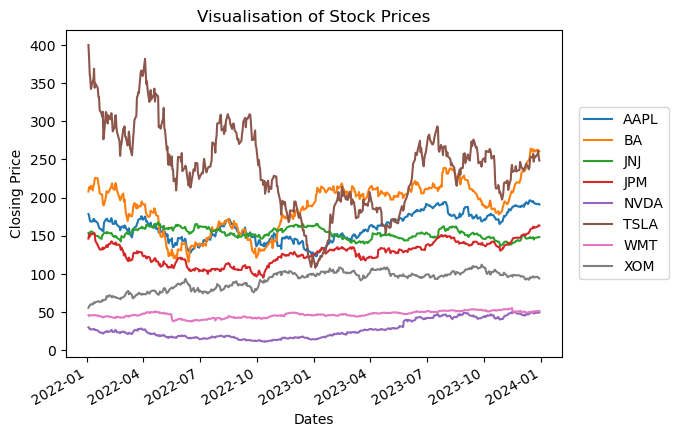

In [40]:
#Visualizing ticker returns
plt.figure(figsize=(15,15))
data['Close'].plot()
plt.legend(loc = 'center left', #anchor point is left center of legend box
           bbox_to_anchor = (1.02, 0.5))
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.title('Visualisation of Stock Prices')
plt.show()

In [41]:
#Calculating Daily Returns
daily_returns = data['Close'].pct_change().dropna()
daily_returns.head()

Ticker,AAPL,BA,JNJ,JPM,NVDA,TSLA,WMT,XOM
Date,,,,,,,,
2022-01-04,-0.012691,0.027759,-0.002681,0.037910,-0.027589,-0.041833,-0.018320,0.037614
2022-01-05,-0.026600,-0.002621,0.006663,-0.018282,-0.057562,-0.053471,0.013521,0.012438
2022-01-06,-0.016694,-0.008119,-0.003426,0.010624,0.020794,-0.021523,-0.002779,0.023521
2022-01-07,0.000988,0.019684,0.013517,0.009908,-0.033040,-0.035447,0.009546,0.008197
2022-01-10,0.000116,-0.028724,-0.004944,0.000957,0.005616,0.030342,-0.001932,-0.005953
